In [20]:
#Importing necessary libraries
import warnings
warnings.filterwarnings("ignore")



import numpy as np
import pandas as pd
import os,sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
#read dataset
ICA = pd.read_csv("loan_approval_dataset.csv")
#first 10 rows of the dataset.
ICA.head(n=10)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   
5        6                  0       Graduate            Yes        4800000   
6        7                  5       Graduate             No        8700000   
7        8                  2       Graduate            Yes        5700000   
8        9                  0       Graduate            Yes         800000   
9       10                  5   Not Graduate             No        1100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   
5      13500000          10           319                    6800000   
6      33000000           4           678                   22500000   
7      15000000          20           382                   13200000   
8       2200000          20           782                    1300000   
9       4300000          10           388                    3200000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   
5                   8300000              13700000            5100000   
6                  14800000              29200000            4300000   
7                   5700000              11800000            6000000   
8                    800000               2800000             600000   
9                   1400000               3300000            1600000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected  
5     Rejected  
6     Approved  
7     Rejected  
8     Approved  
9     Rejected

In [6]:
#displaying the shape
ICA.shape

(4269, 13)

In [7]:
#basic statistics of the dataset
ICA.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [8]:
ICA.duplicated().sum()

0

In [9]:
ICA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [10]:
#finding unique values in the column
for i in ICA.columns:
    print("*******************************************************************",i,"************************************************************************")
    print()
    print(set(ICA[i].tolist()))
    print()

******************************************************************* loan_id ************************************************************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 19

In [11]:
ICA.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [14]:
ICA.columns = ICA.columns.str.replace(' ', '')

In [15]:
ICA.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [16]:
ICA["loan_status"].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

In [17]:
# Removing unnecessary column
ICA = ICA.drop(['loan_id'], axis=1)

In [18]:
ICA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


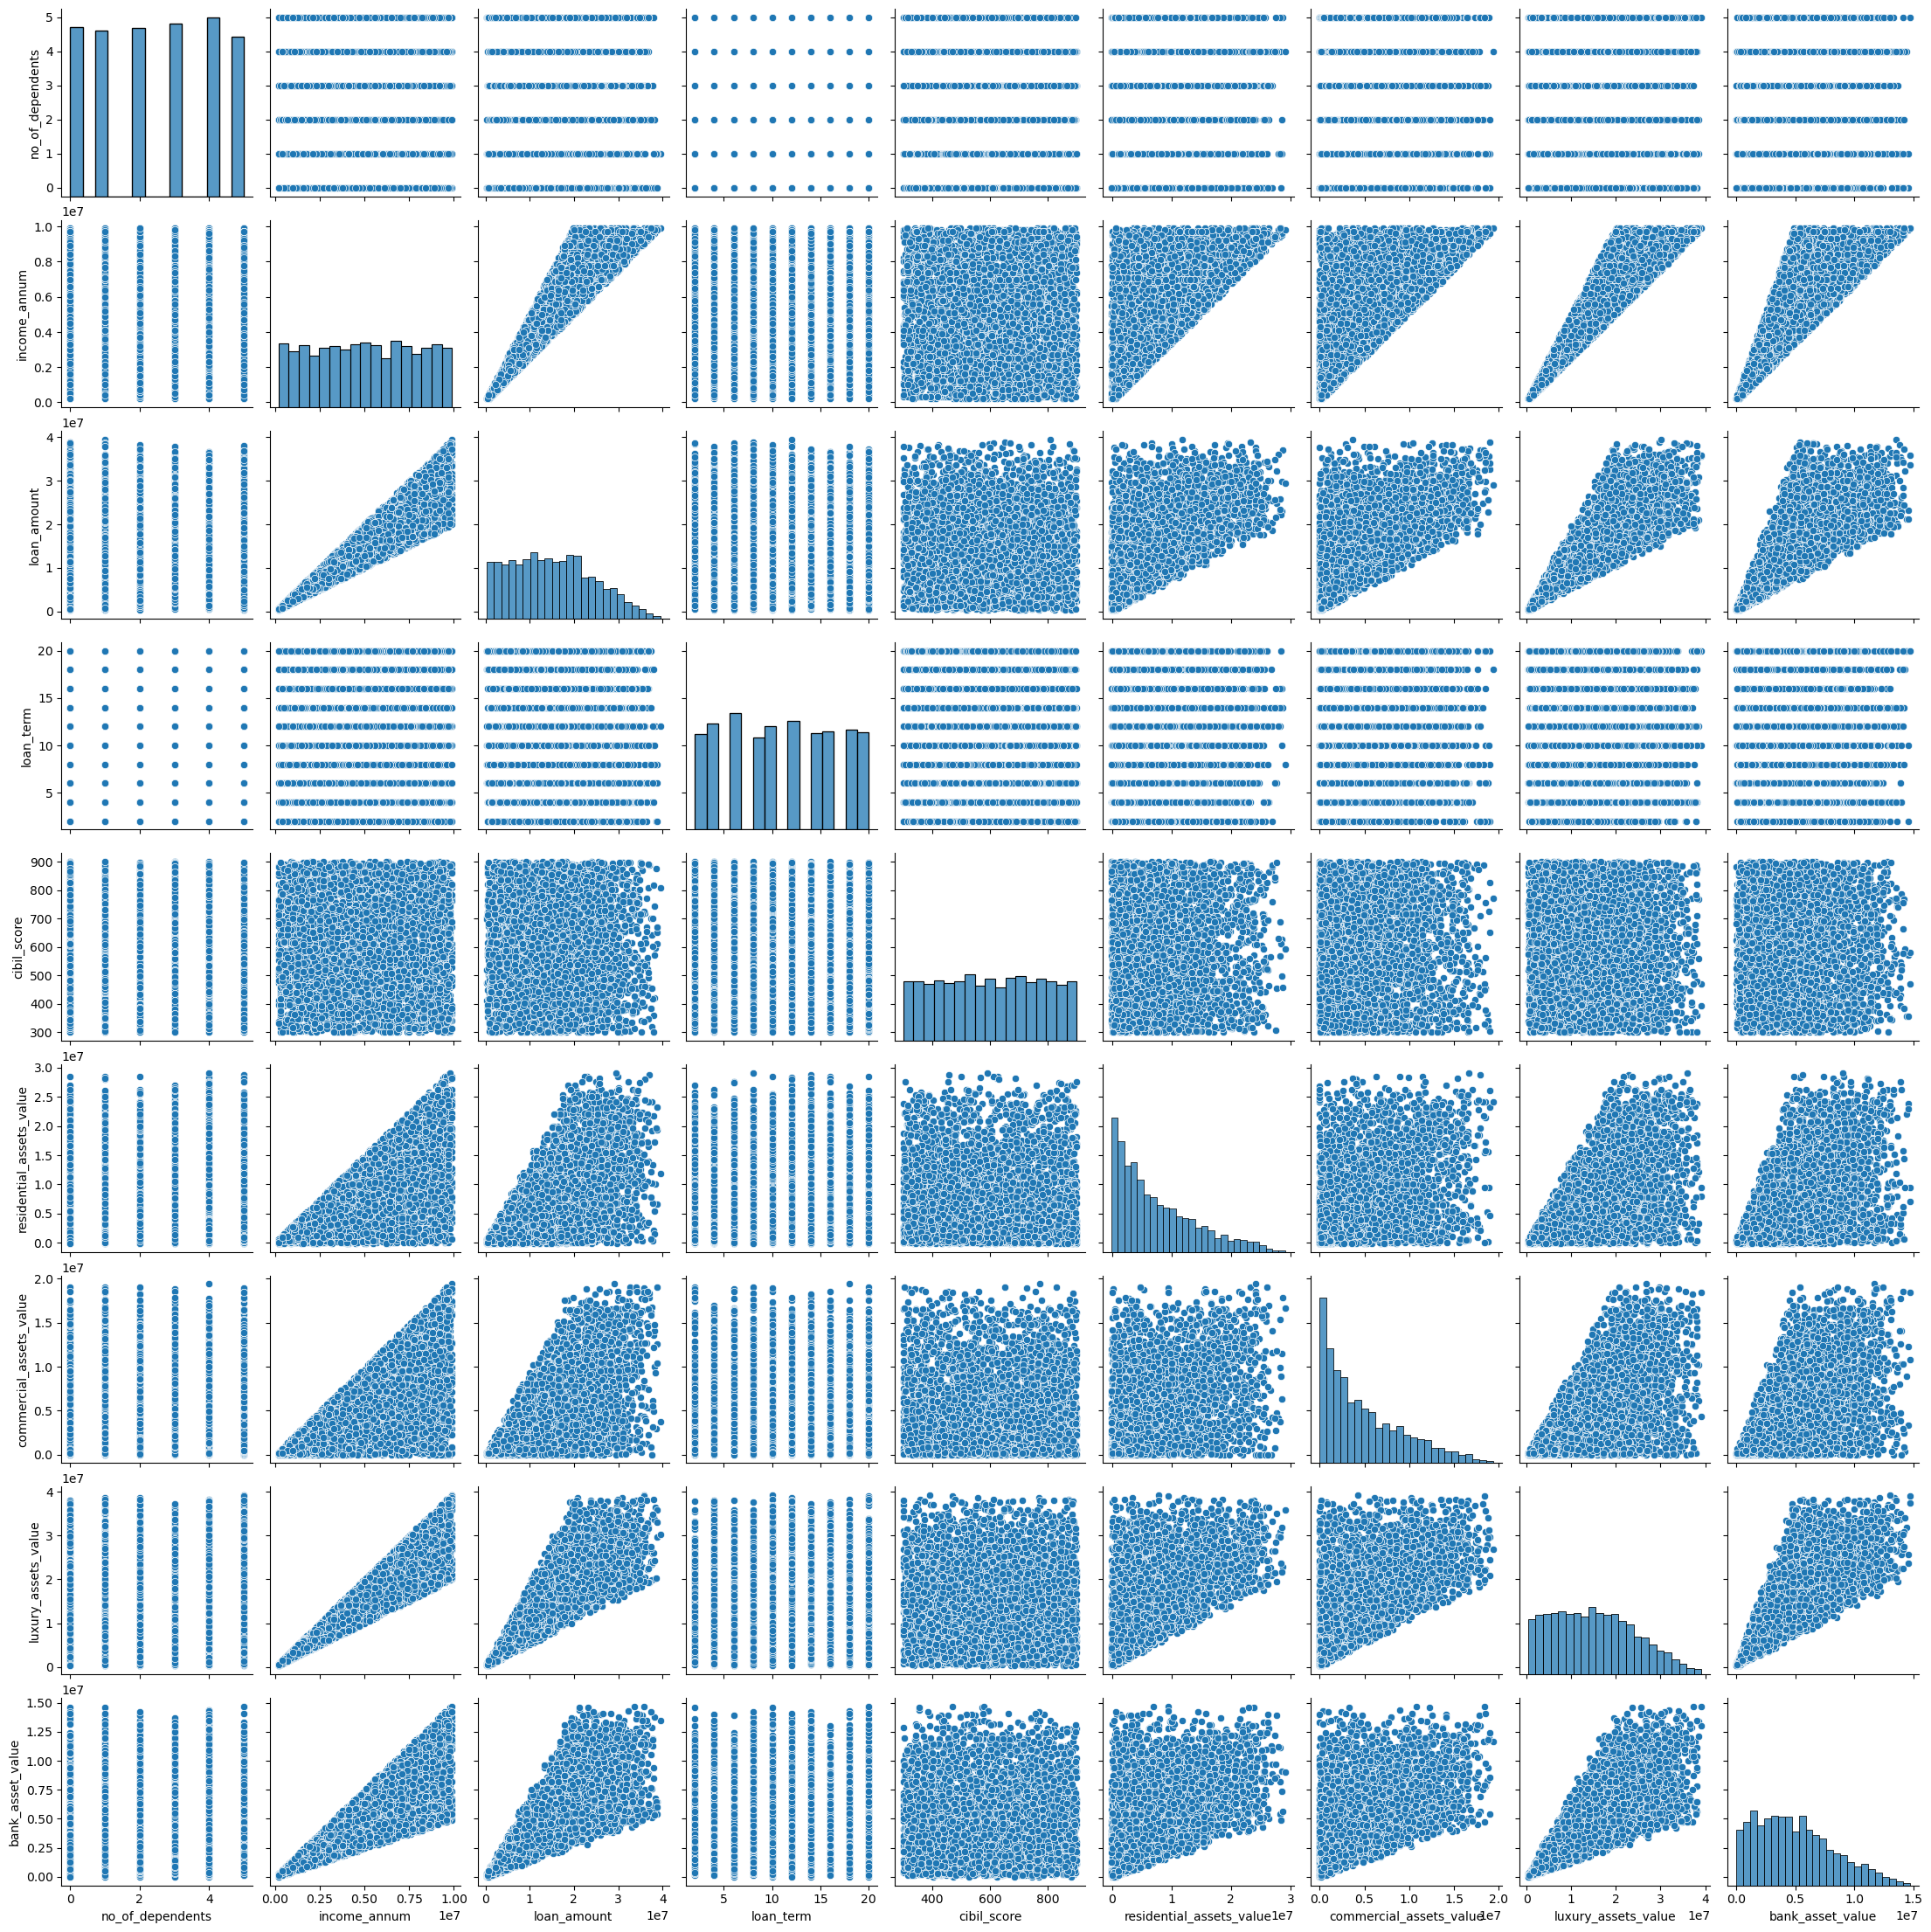

In [21]:
sns.pairplot(ICA)
plt.show()

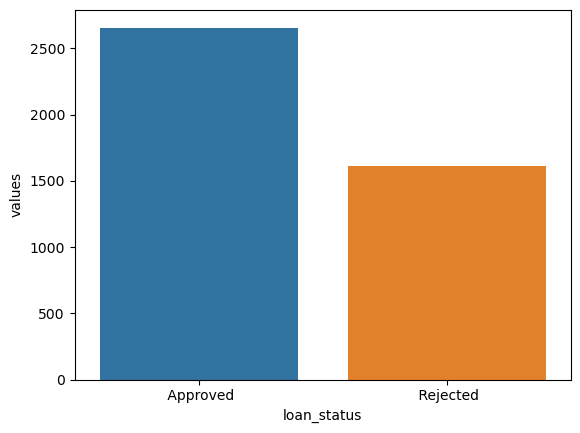

In [24]:
temp = ICA["loan_status"].value_counts()
temp_df = pd.DataFrame({"loan_status": temp.index, 'values': temp.values})
# Using seaborn to create a bar plot
sns.barplot(x='loan_status', y='values', data=temp_df)
plt.show()


In [25]:
ICA.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [26]:
#I will need to encode Education,Self-Employed,And Loan status
ICA_encoded = pd.get_dummies(ICA, columns=['education', 'self_employed'], drop_first=True)


In [30]:
# Check the first few rows of the modified ICA
print(ICA_encoded.head())

# Or check the information about theICA
print(ICA_encoded.info())


   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value loan_status  education_ Not Graduate  self_employed_ Yes  \
0           

In [31]:
# Using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ICA_encoded['loan_status_encoded'] = le.fit_transform(ICA['loan_status'])


In [32]:
# Check the first few rows of the modified ICA
print(ICA_encoded.head())

# Or check the information about the ICA
print(ICA_encoded.info())


   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value loan_status  education_ Not Graduate  self_employed_ Yes  \
0           

In [33]:
# Check the data types of individual columns
print(ICA_encoded.dtypes)


no_of_dependents             int64
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
education_ Not Graduate      uint8
self_employed_ Yes           uint8
loan_status_encoded          int32
dtype: object


In [34]:
print(ICA.columns)


Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


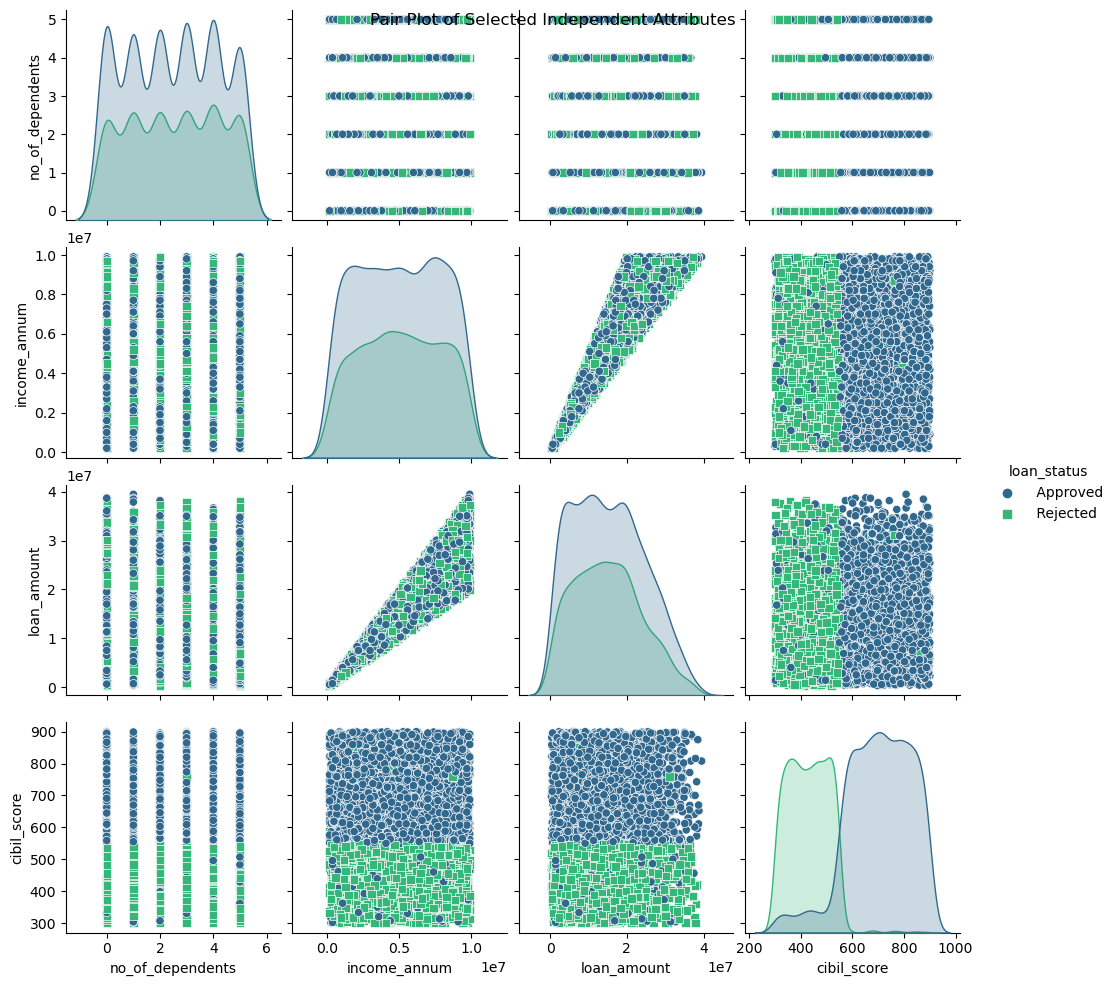

In [35]:
# Remove leading whitespaces from column names
ICA.columns = [col.strip() for col in ICA.columns]


independent_attributes = ICA.drop(['loan_status'], axis=1)  # Exclude the target variable

# Select a subset of features (adjust as needed)
subset_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'cibil_score']

# Add the target variable back for visualization
subset_data = pd.concat([independent_attributes[subset_features], ICA['loan_status']], axis=1)

# Create a pair plot
sns.pairplot(subset_data, hue='loan_status', markers=['o', 's'], palette='viridis')
plt.suptitle('Pair Plot of Selected Independent Attributes')
plt.show()


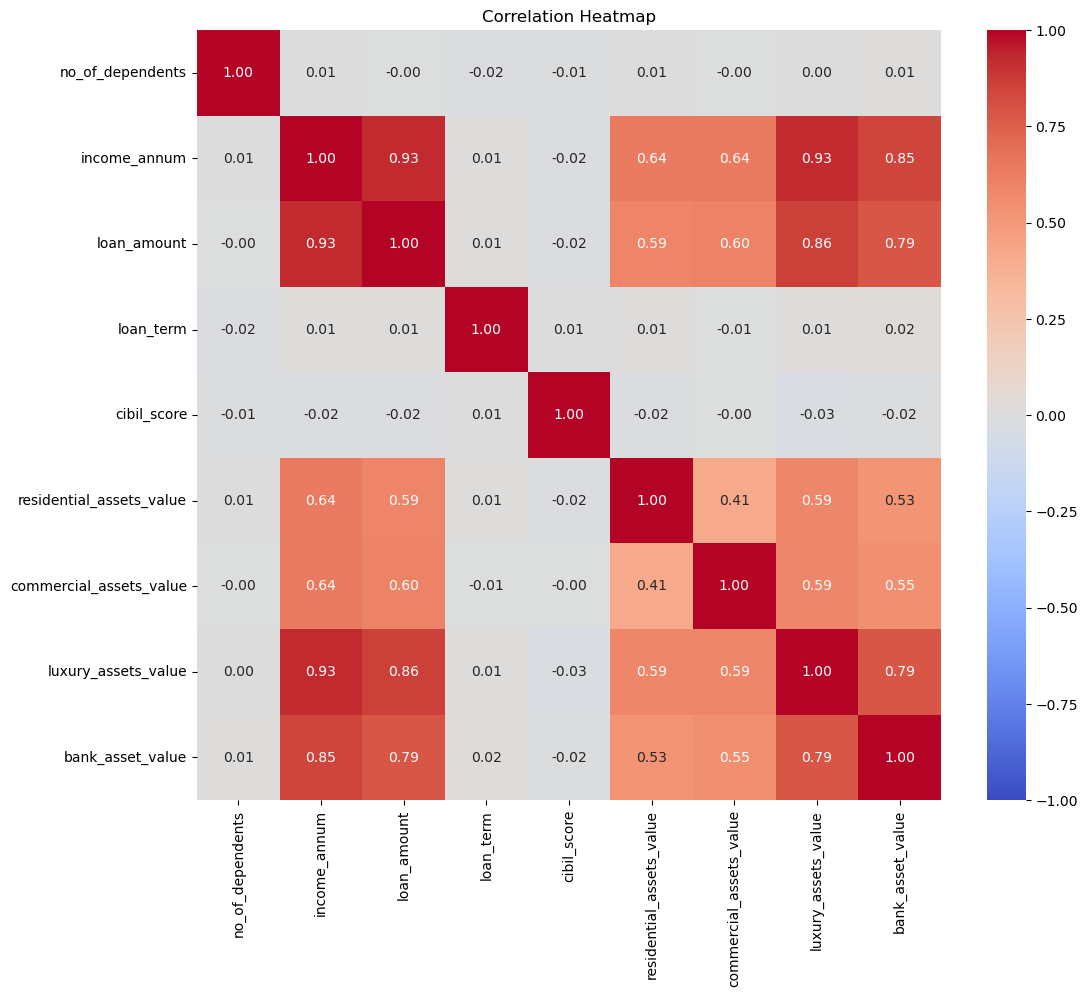

In [36]:
# Calculate the correlation matrix
correlation_matrix = ICA.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin= -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()


In [41]:
# Checking for highly Correlated Features
# Setting a threshold for high correlation
threshold = 0.7
# Initializing a list to store highly correlated features pairs
highly_correlated_pairs = []
# Iterating through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Store the names of highly correlated features
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)
if not highly_correlated_pairs:
    print("No highly correlated features found.")
else:
    print("Highly correlated feature pairs:")
    for pair in highly_correlated_pairs:
        print(pair)

Highly correlated feature pairs:
('income_annum', 'loan_amount')
('income_annum', 'luxury_assets_value')
('income_annum', 'bank_asset_value')
('loan_amount', 'luxury_assets_value')
('loan_amount', 'bank_asset_value')
('luxury_assets_value', 'bank_asset_value')


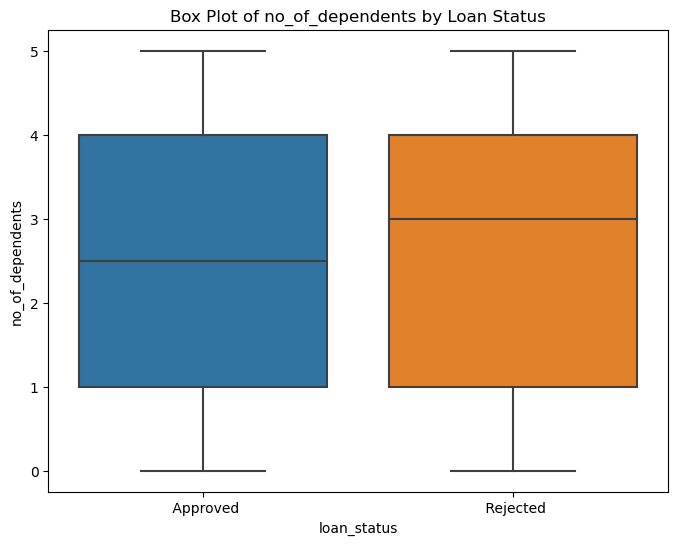

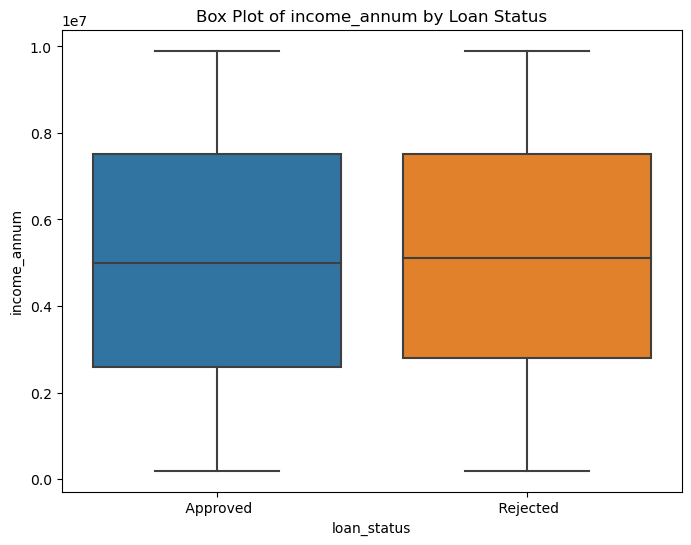

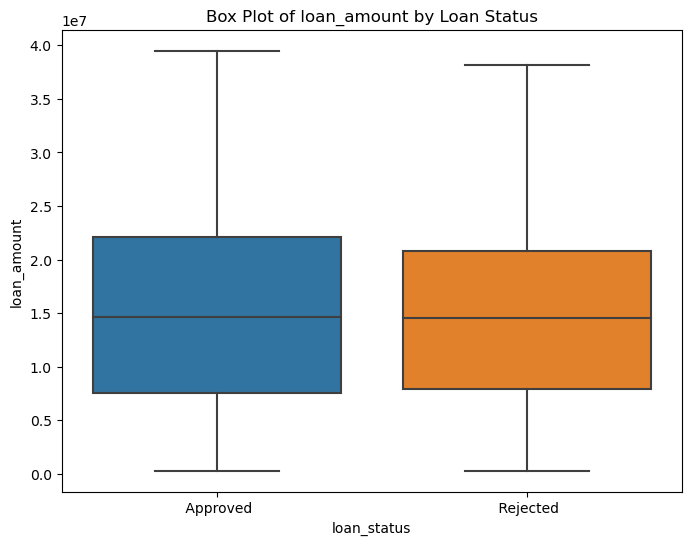

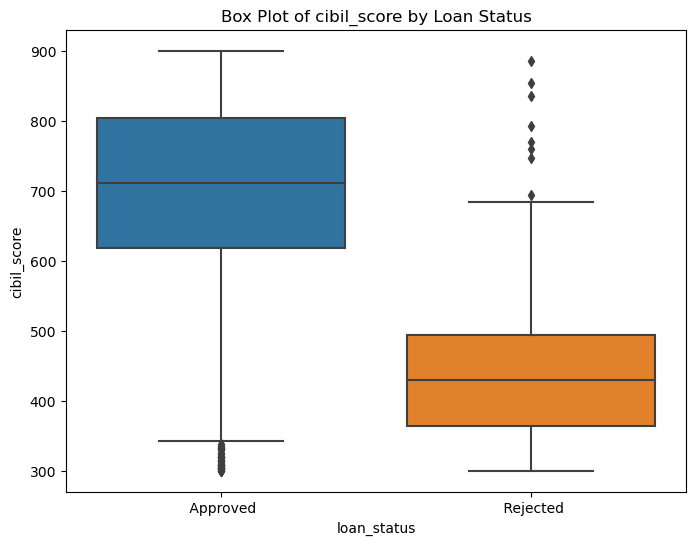

In [20]:
for feature in subset_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='loan_status', y=feature, data=ICA)
    plt.title(f'Box Plot of {feature} by Loan Status')
    plt.show()


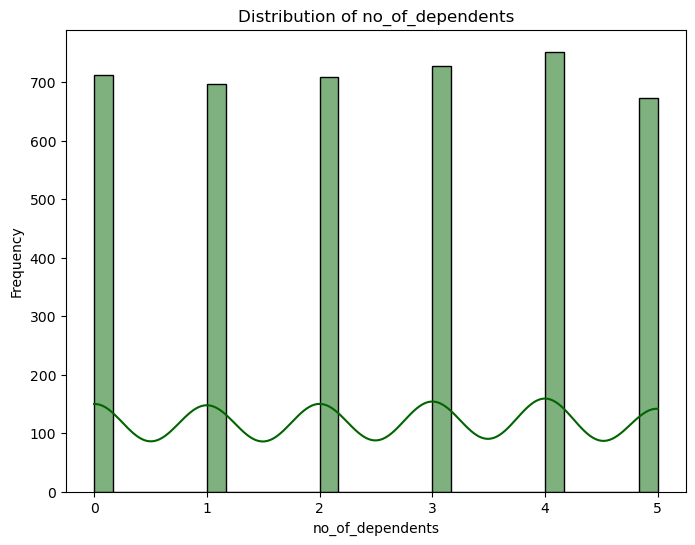

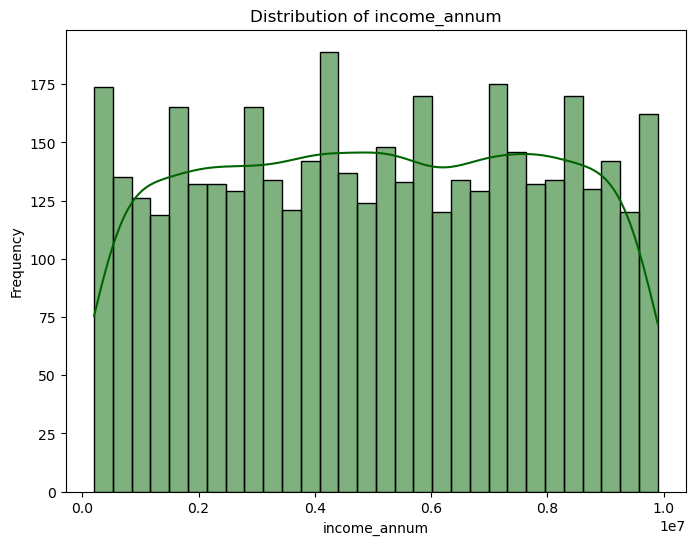

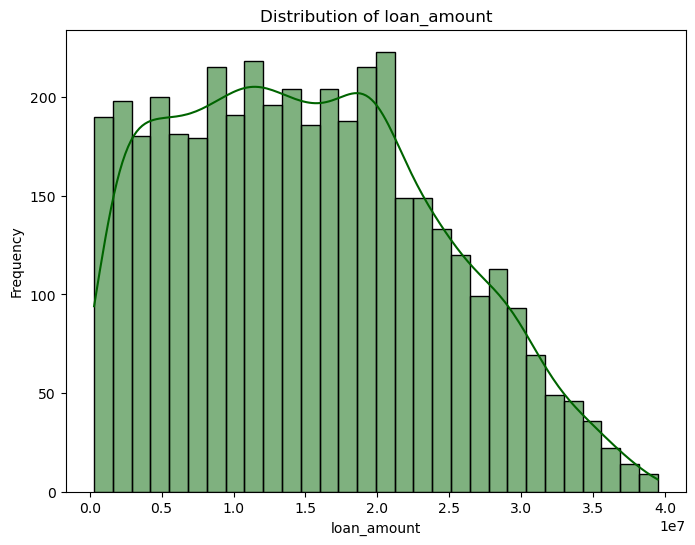

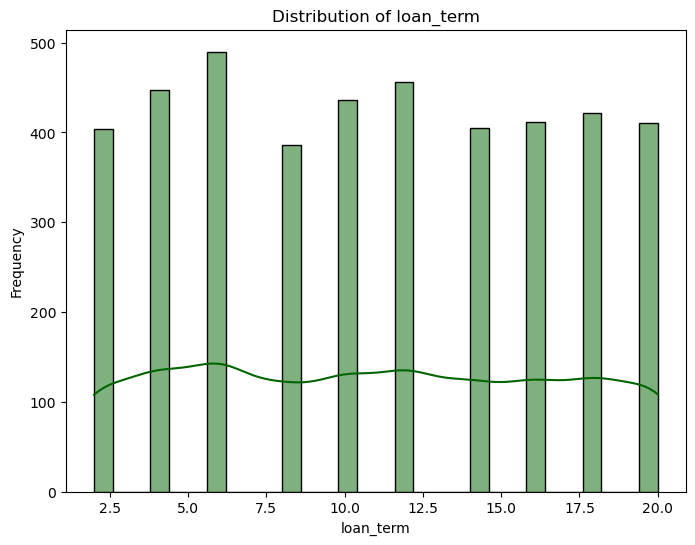

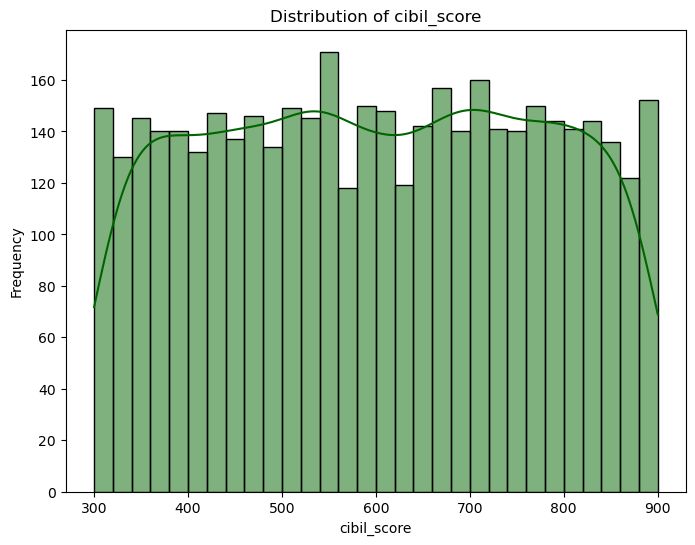

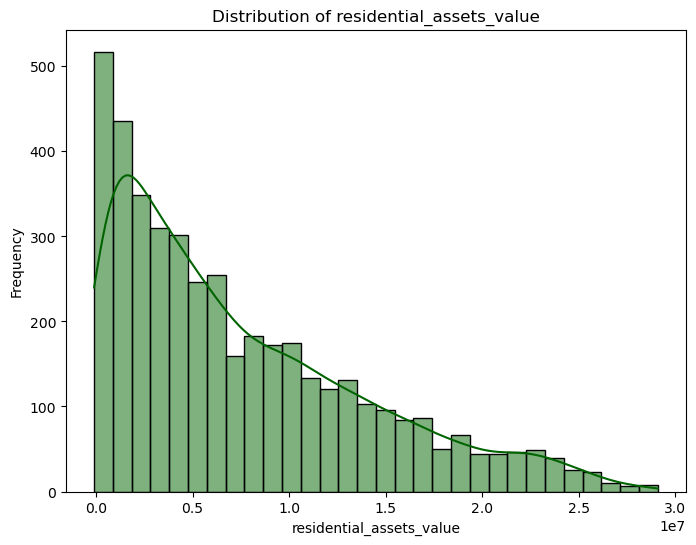

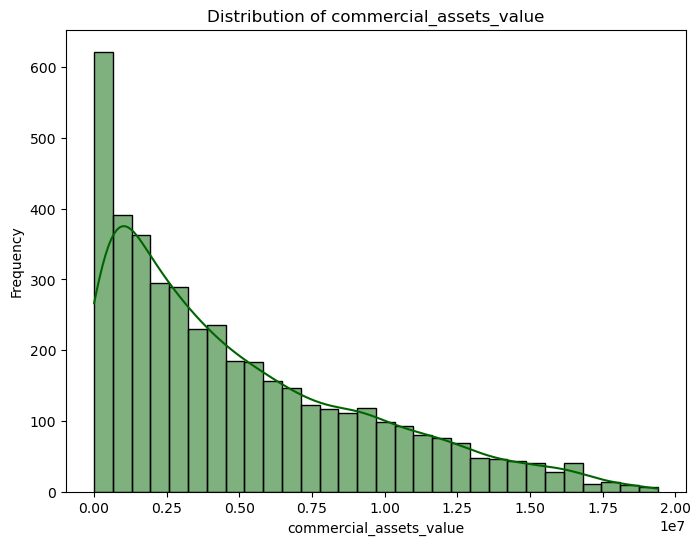

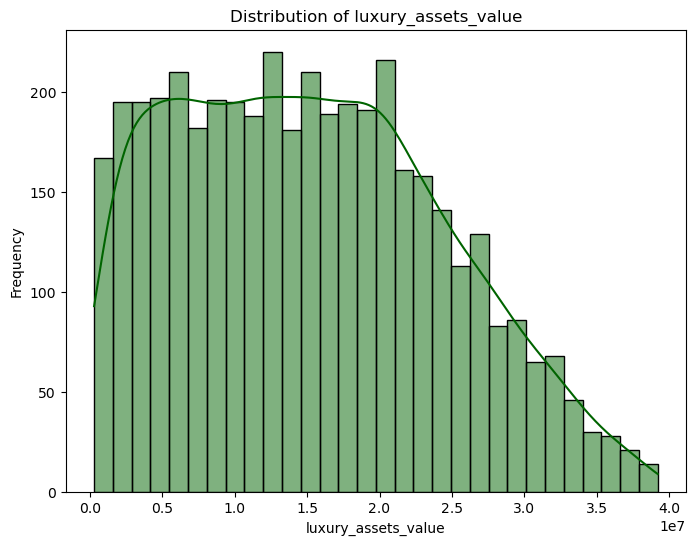

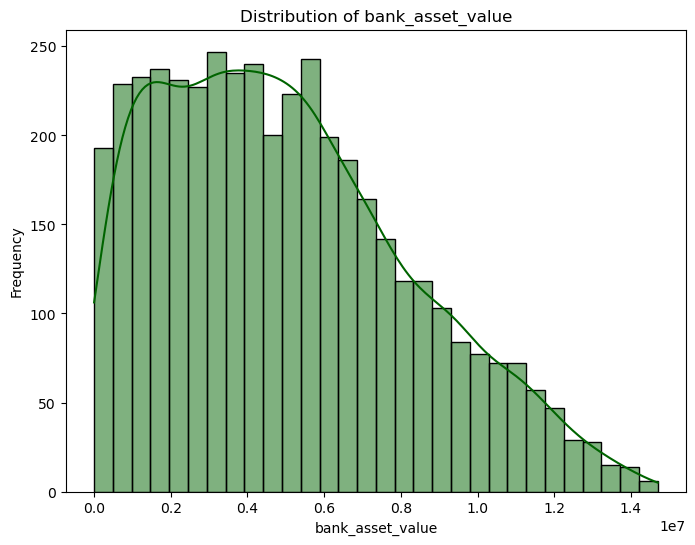

In [28]:

#distribution of Numerical Columns(why?because i want my data to be normally distributed)
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(ICA[column], kde=True, bins=30, color='darkgreen')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


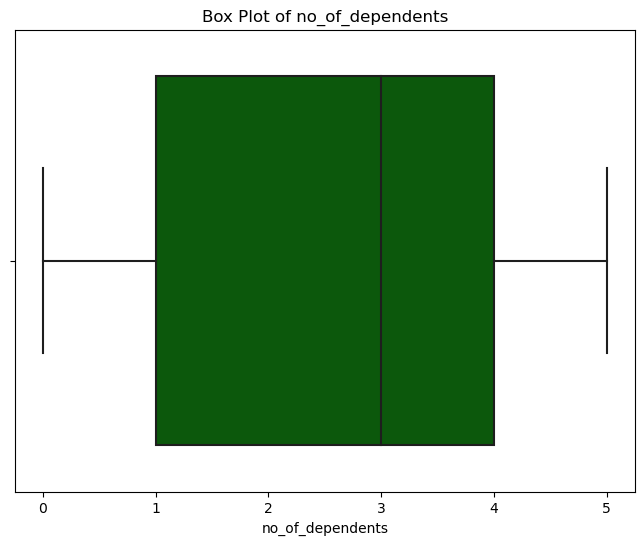

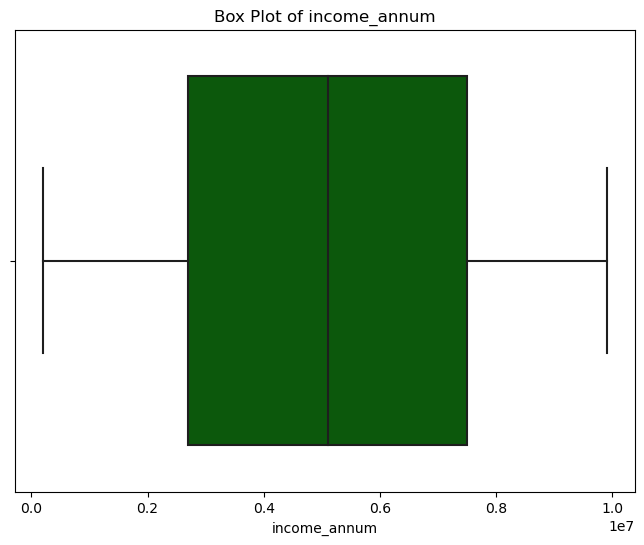

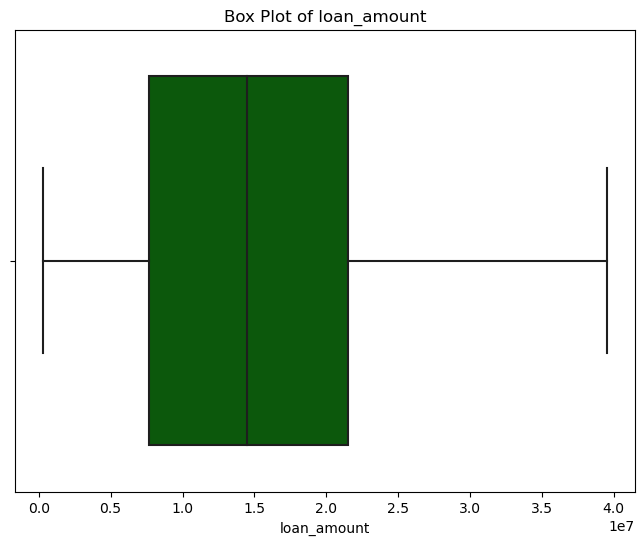

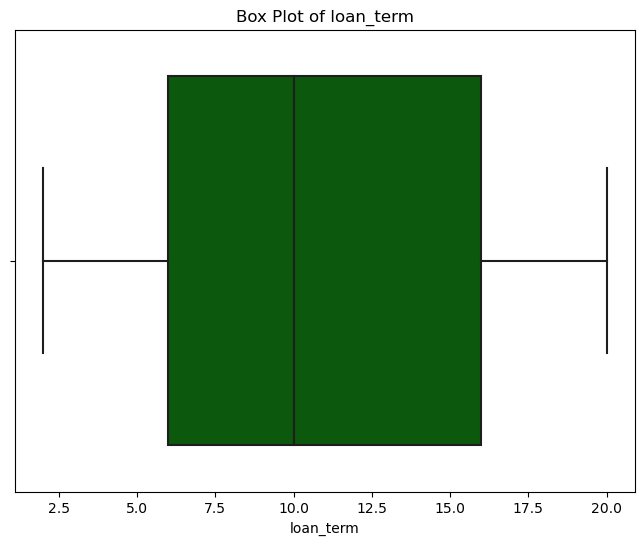

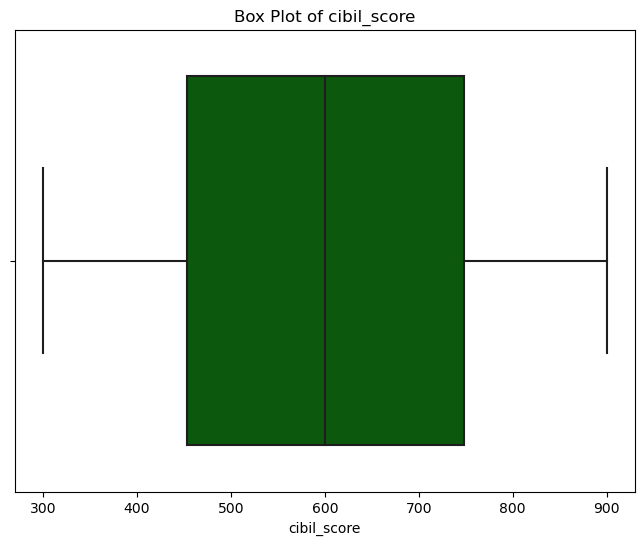

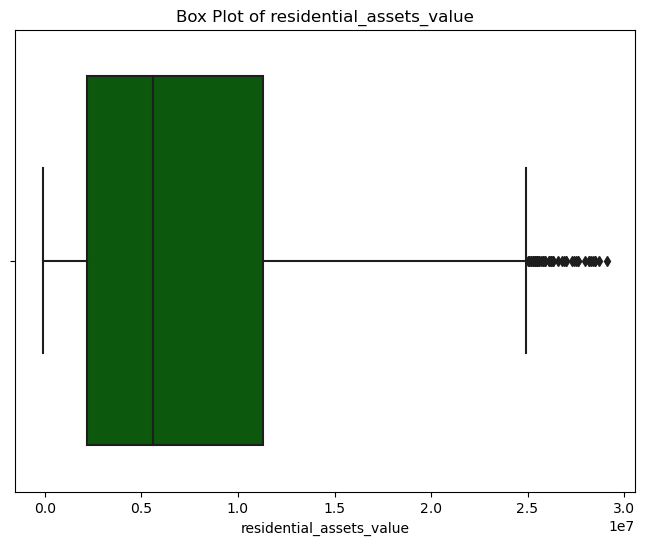

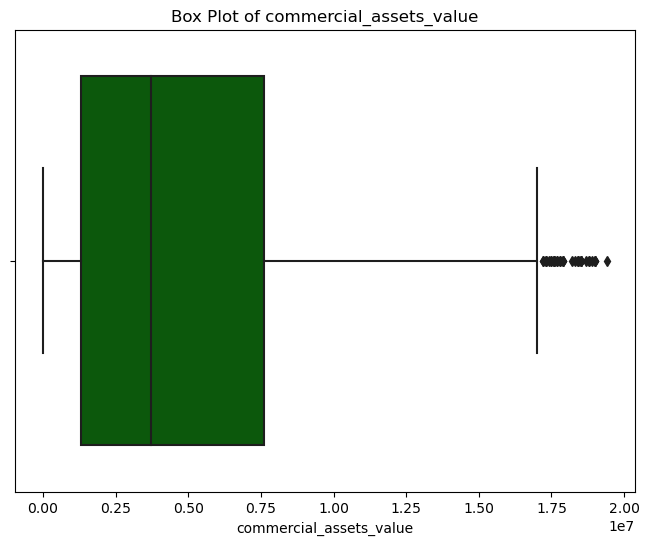

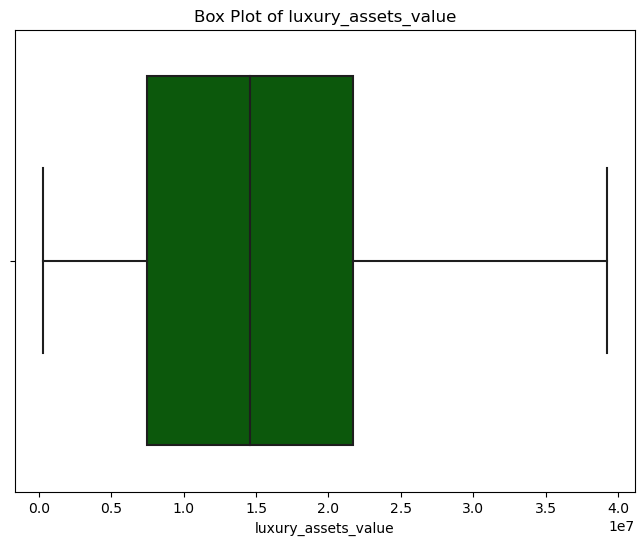

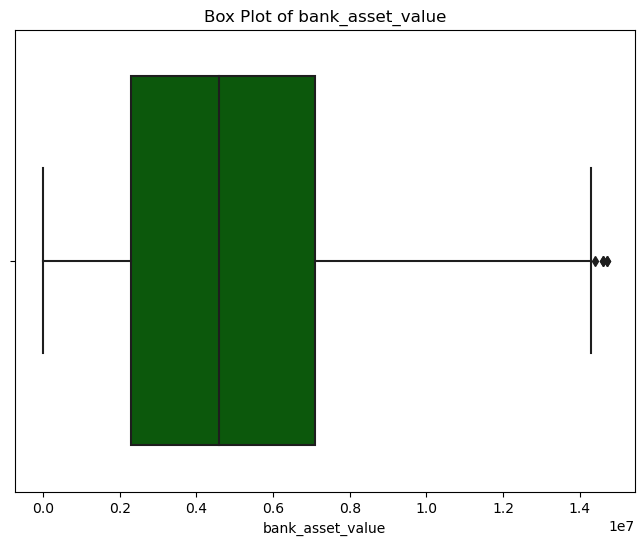

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Plot box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=ICA[column], color='darkgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


In [25]:
# Calculate IQR for each numerical column
Q1 = ICA[numerical_columns].quantile(0.25)
Q3 = ICA[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Print the calculated IQR for each column
print("Interquartile Range (IQR):")
print(IQR)

# Define threshold for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Print the threshold values
print("\nLower Threshold for Outliers:")
print(lower_threshold)
print("\nUpper Threshold for Outliers:")
print(upper_threshold)



Interquartile Range (IQR):
no_of_dependents                   3.0
income_annum                 4800000.0
loan_amount                 13800000.0
loan_term                         10.0
cibil_score                      295.0
residential_assets_value     9100000.0
commercial_assets_value      6300000.0
luxury_assets_value         14200000.0
bank_asset_value             4800000.0
dtype: float64

Lower Threshold for Outliers:
no_of_dependents                  -3.5
income_annum                -4500000.0
loan_amount                -13000000.0
loan_term                         -9.0
cibil_score                       10.5
residential_assets_value   -11450000.0
commercial_assets_value     -8150000.0
luxury_assets_value        -13800000.0
bank_asset_value            -4900000.0
dtype: float64

Upper Threshold for Outliers:
no_of_dependents                   8.5
income_annum                14700000.0
loan_amount                 42200000.0
loan_term                         31.0
cibil_score            

In [ ]:
#Any value below the lower threshold or above the upper threshold in each column may be considered a potential outlier.

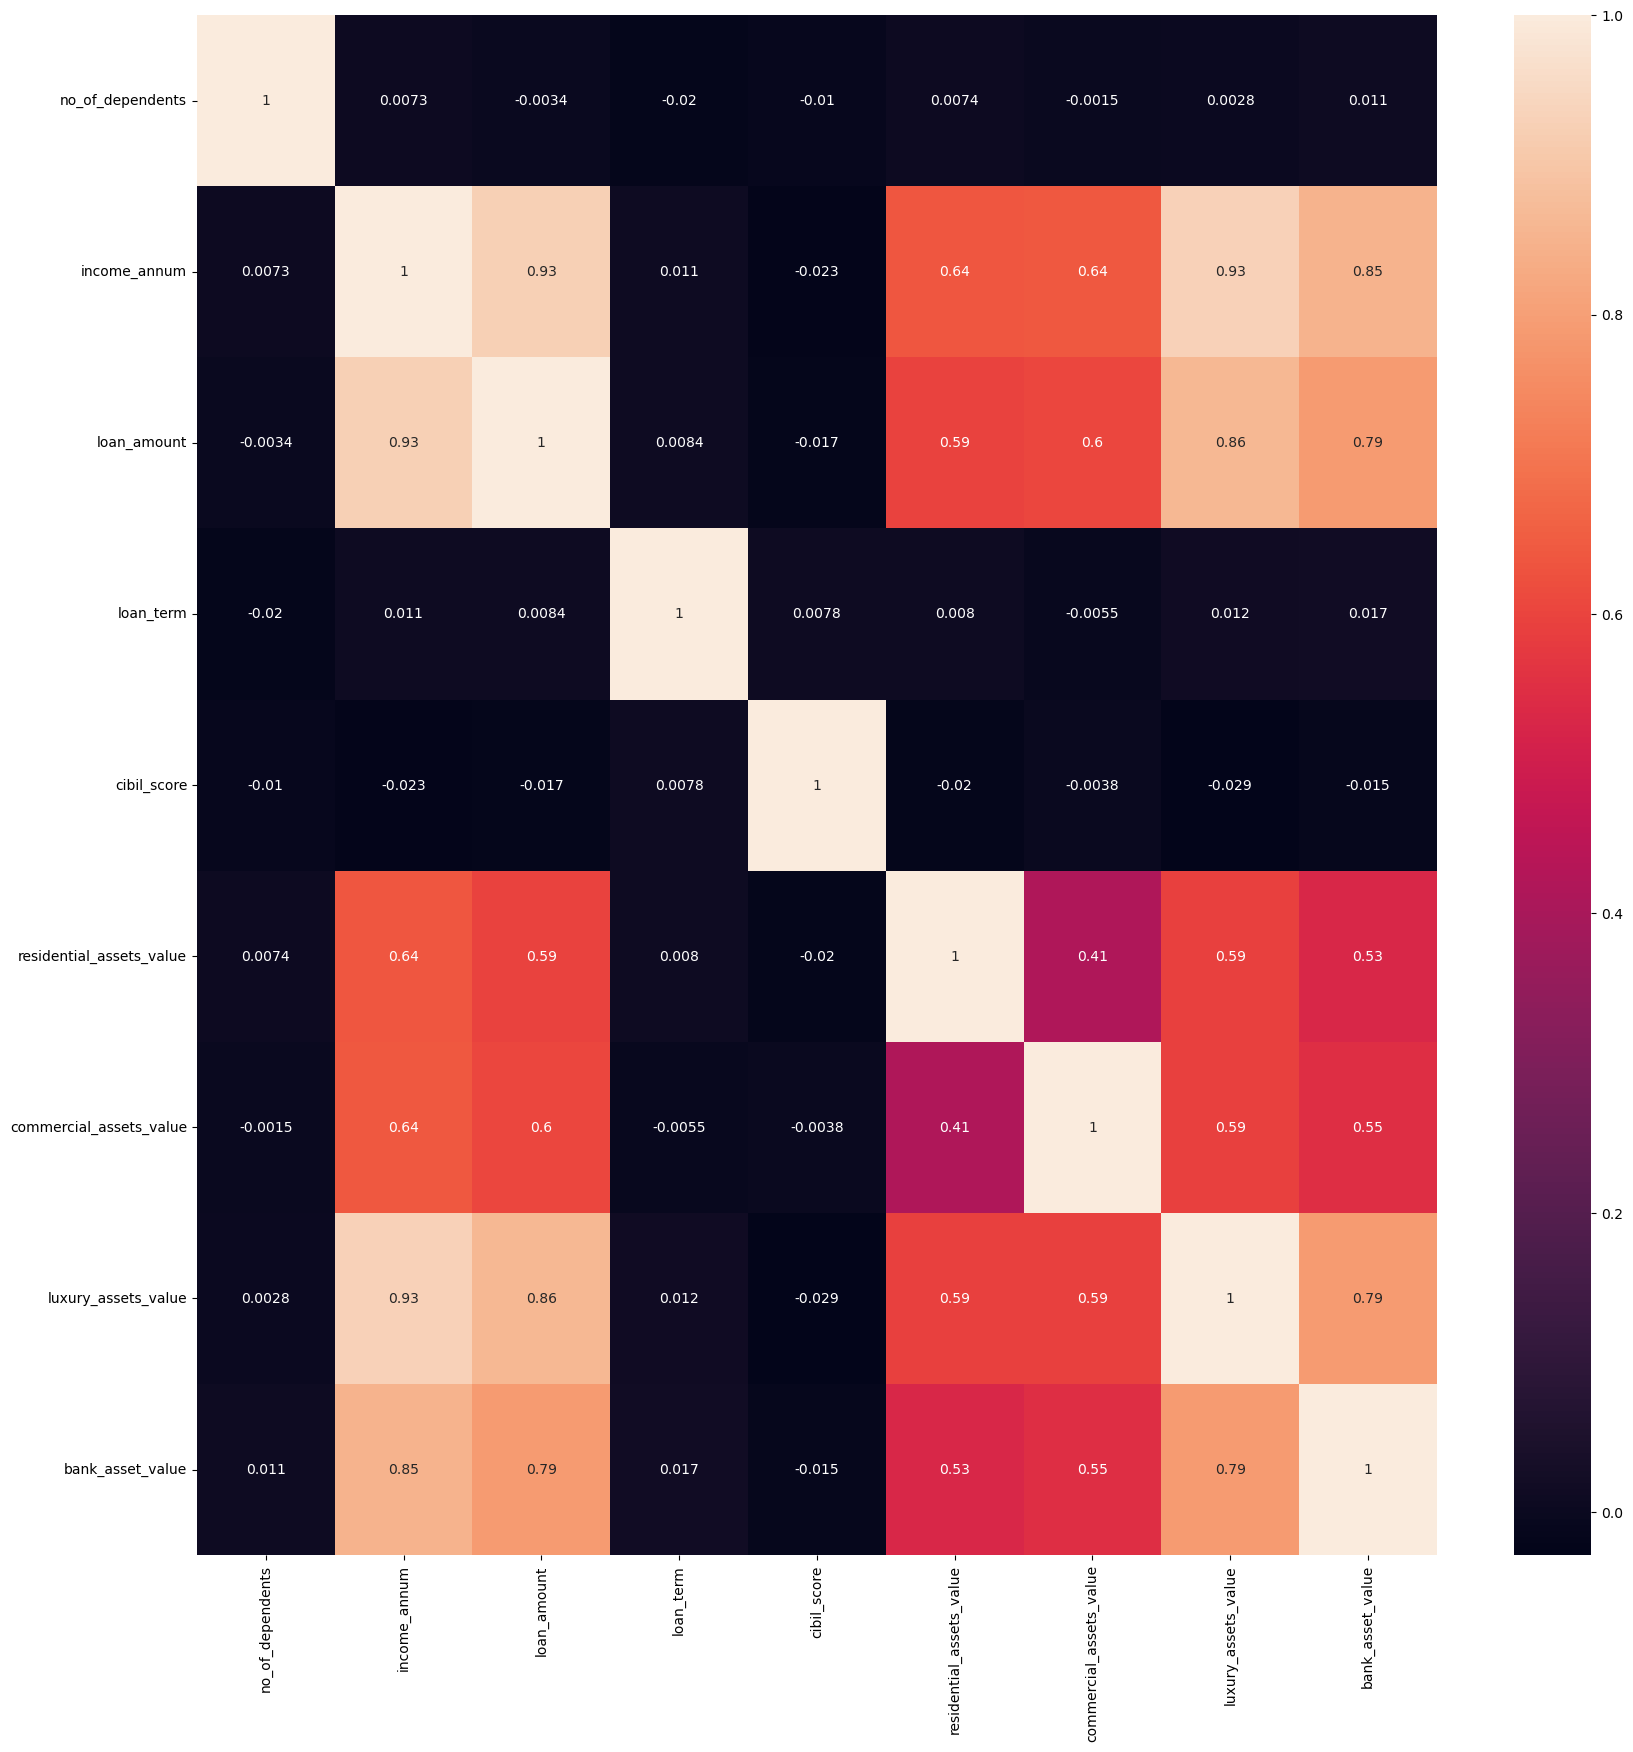

In [38]:
# Assuming 'corr' is your correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()


In [35]:

correlation_matrix = ICA.corr()

# Display the correlation matrix
print(correlation_matrix)


                          no_of_dependents  income_annum  loan_amount  \
no_of_dependents                  1.000000      0.007266    -0.003366   
income_annum                      0.007266      1.000000     0.927470   
loan_amount                      -0.003366      0.927470     1.000000   
loan_term                        -0.020111      0.011488     0.008437   
cibil_score                      -0.009998     -0.023034    -0.017035   
residential_assets_value          0.007376      0.636841     0.594596   
commercial_assets_value          -0.001531      0.640328     0.603188   
luxury_assets_value               0.002817      0.929145     0.860914   
bank_asset_value                  0.011163      0.851093     0.788122   

                          loan_term  cibil_score  residential_assets_value  \
no_of_dependents          -0.020111    -0.009998                  0.007376   
income_annum               0.011488    -0.023034                  0.636841   
loan_amount                0.008437

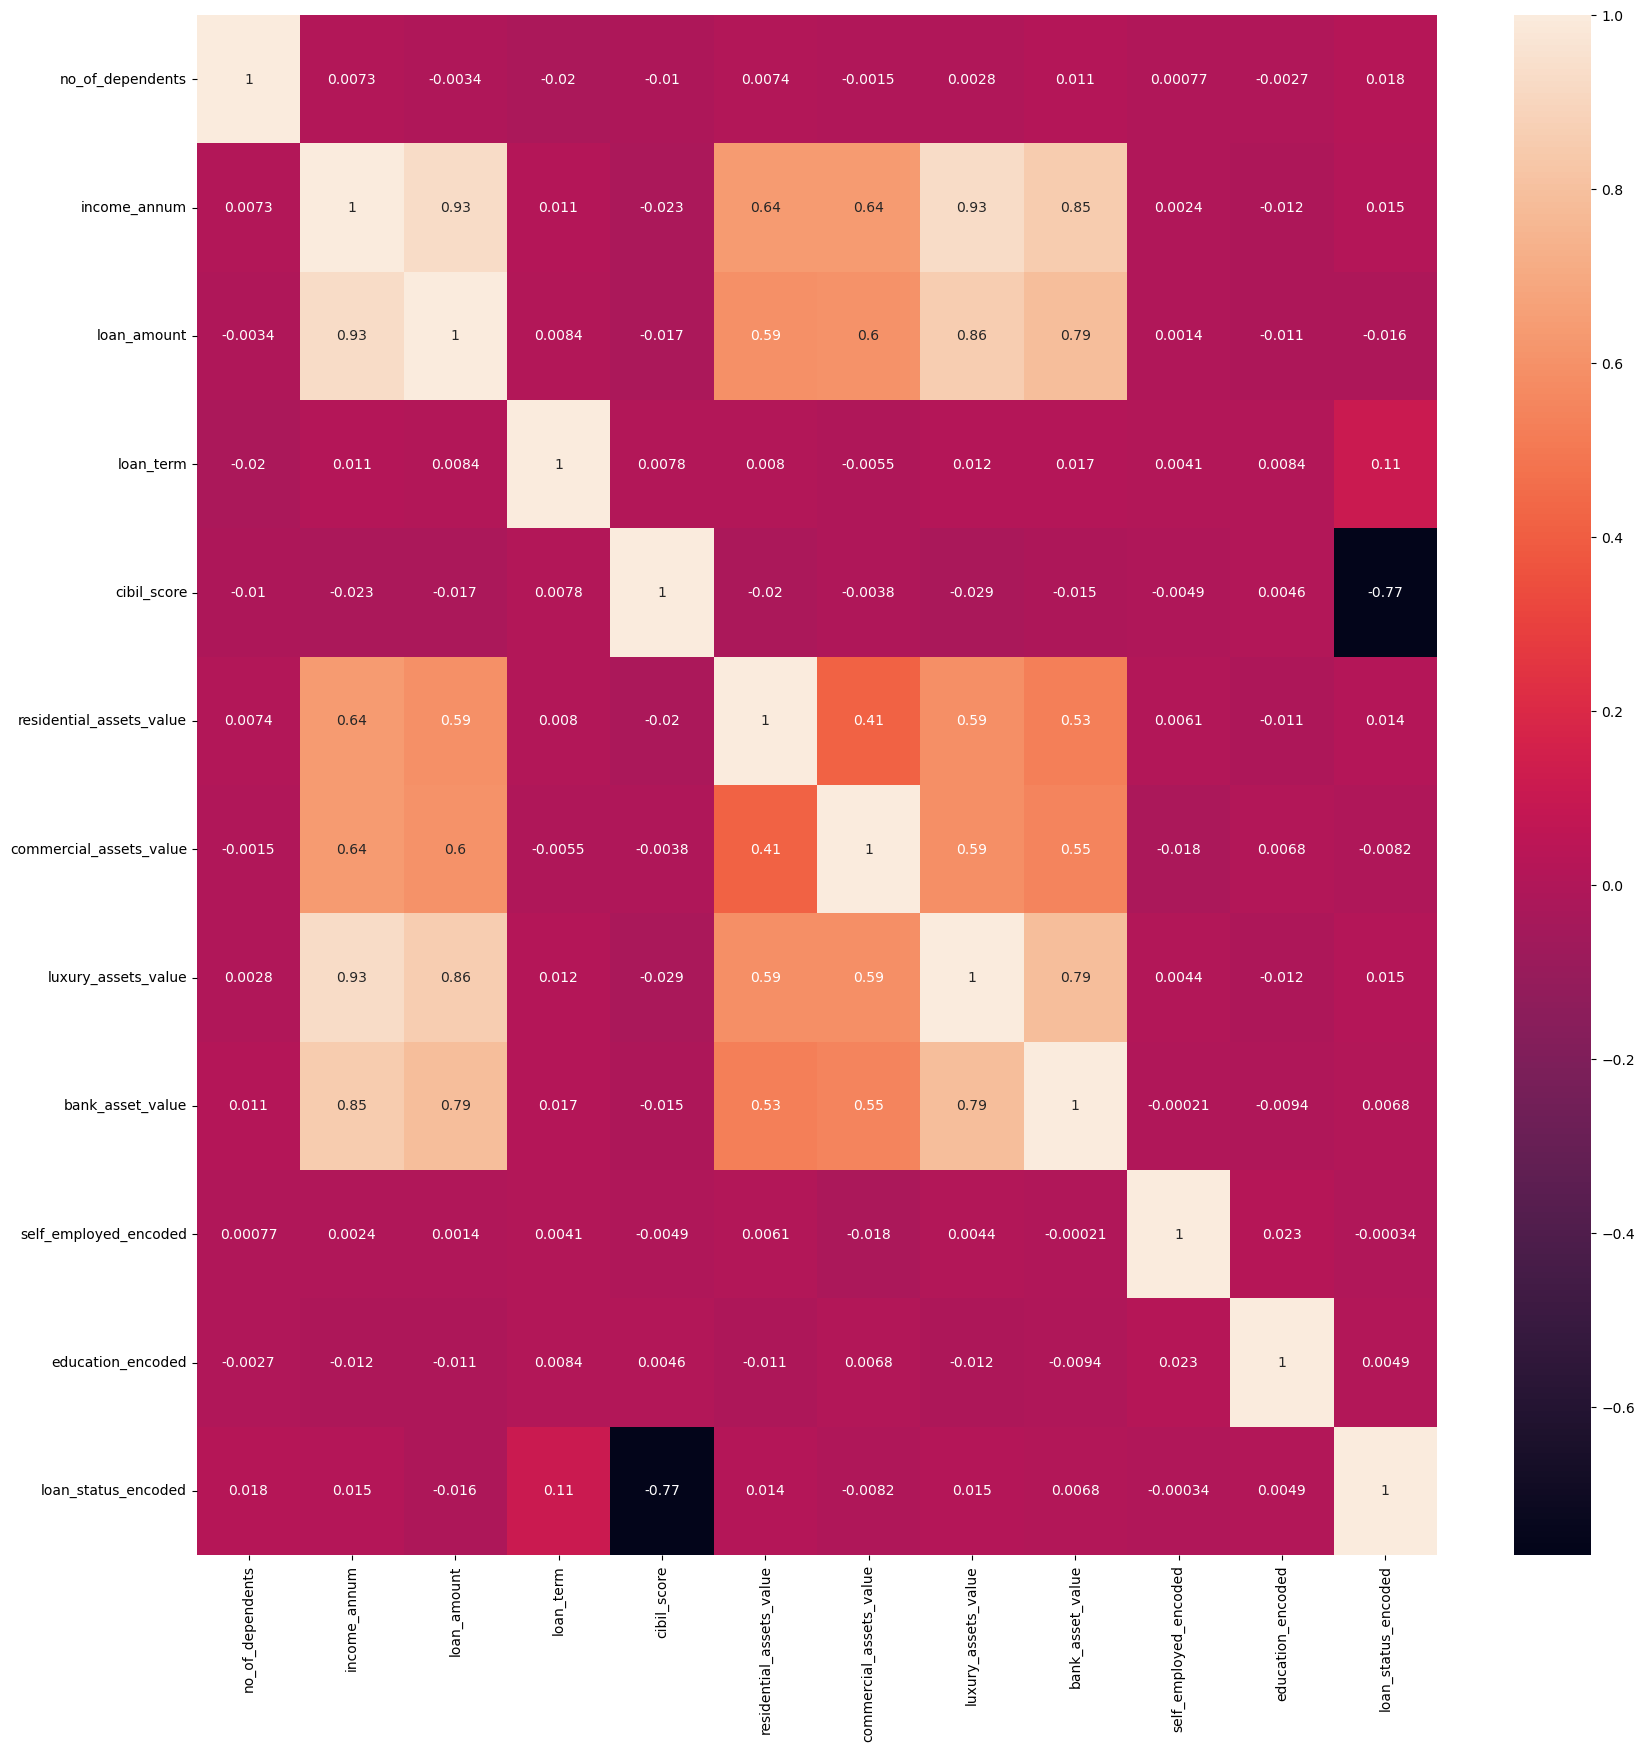

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ICA['self_employed_encoded'] = label_encoder.fit_transform(ICA['self_employed'])
ICA['education_encoded'] = label_encoder.fit_transform(ICA['education'])
ICA['loan_status_encoded'] = label_encoder.fit_transform(ICA['loan_status'])

# Calculate the correlation matrix
corr_all = ICA.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_all, annot=True)
plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'ICA' is your DataFrame
label_encoder = LabelEncoder()

# Apply label encoding to categorical variables
ICA['self_employed_encoded'] = label_encoder.fit_transform(ICA['self_employed'])
ICA['education_encoded'] = label_encoder.fit_transform(ICA['education'])
ICA['loan_status_encoded'] = label_encoder.fit_transform(ICA['loan_status'])

# Select relevant columns for correlation matrix
columns_for_correlation = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                            'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                            'bank_asset_value', 'self_employed_encoded', 'education_encoded', 'loan_status_encoded']

# Create a subset DataFrame for correlation matrix
correlation_data = ICA[columns_for_correlation]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                          no_of_dependents  income_annum  loan_amount  \
no_of_dependents                  1.000000      0.007266    -0.003366   
income_annum                      0.007266      1.000000     0.927470   
loan_amount                      -0.003366      0.927470     1.000000   
loan_term                        -0.020111      0.011488     0.008437   
cibil_score                      -0.009998     -0.023034    -0.017035   
residential_assets_value          0.007376      0.636841     0.594596   
commercial_assets_value          -0.001531      0.640328     0.603188   
luxury_assets_value               0.002817      0.929145     0.860914   
bank_asset_value                  0.011163      0.851093     0.788122   
self_employed_encoded             0.000765      0.002368     0.001450   
education_encoded                -0.002697     -0.011625    -0.010631   
loan_status_encoded               0.018114      0.015189    -0.016150   

                          loan_term  cibil_score  

In [45]:
#separate independent and dependent varaiable and drop the loan_id column

if 'loan_id' in ICA.columns:
    X = ICA.drop(['loan_id', 'loan_status'], axis=1)
else:
    X = ICA.drop(['loan_status'], axis=1)

y = ICA['loan_status']
print(X)
print(y)



      no_of_dependents      education self_employed  income_annum  \
0                    2       Graduate            No       9600000   
1                    0   Not Graduate           Yes       4100000   
2                    3       Graduate            No       9100000   
3                    3       Graduate            No       8200000   
4                    5   Not Graduate           Yes       9800000   
...                ...            ...           ...           ...   
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8 

Counter({' Approved': 2656, ' Rejected': 1613})


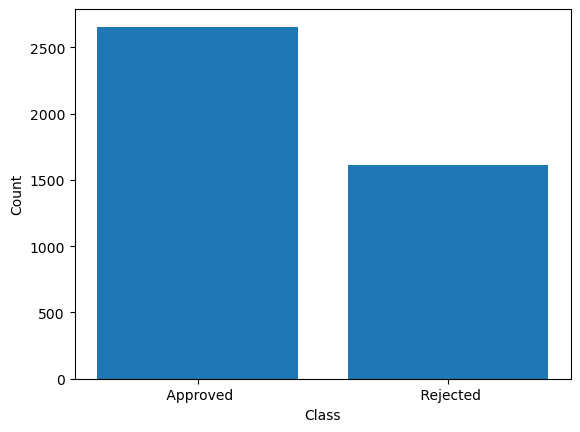

In [52]:


from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


class_counts = Counter(y)
print(class_counts)

# visualize the class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [54]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
print(Counter(y_ros))


Counter({' Approved': 2656, ' Rejected': 2656})


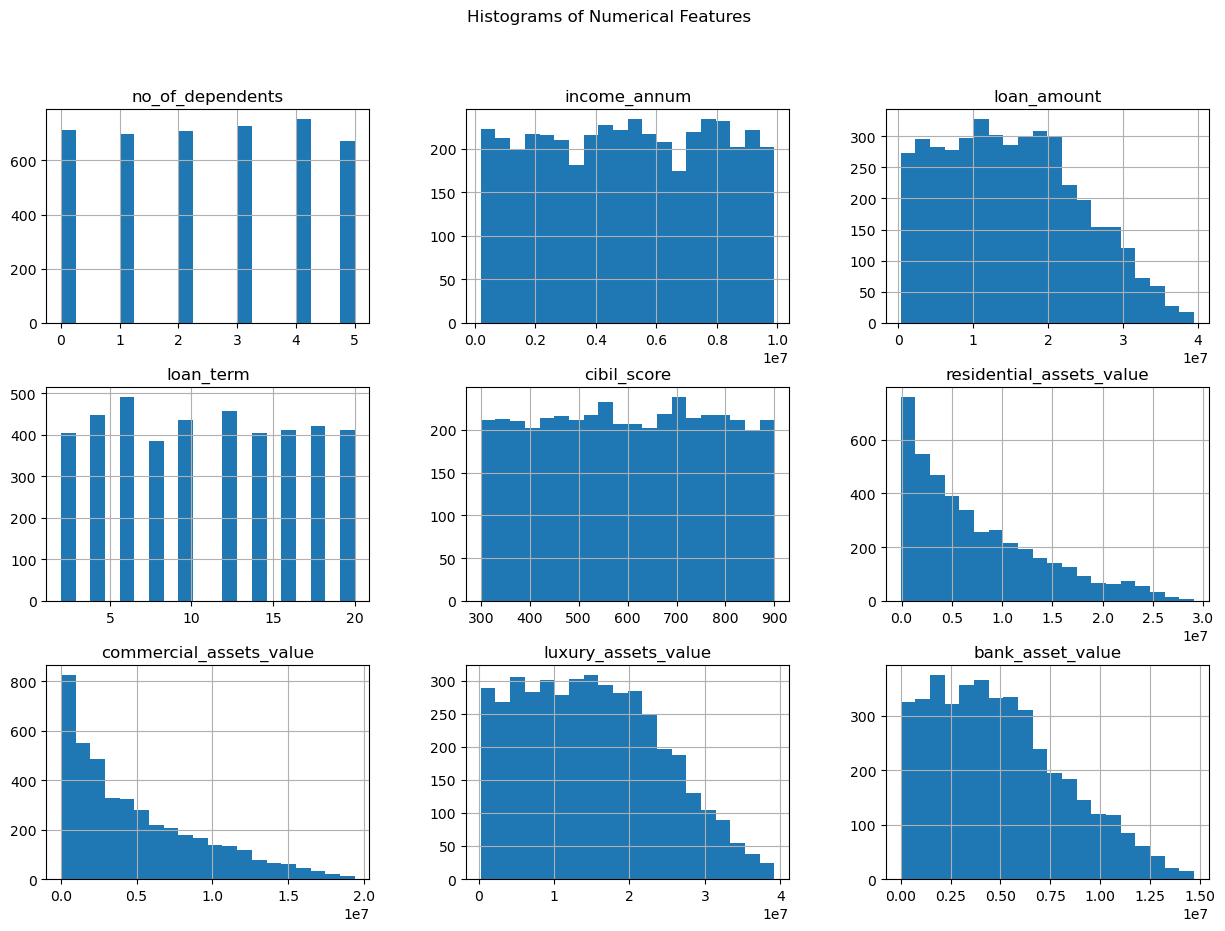

In [55]:
import matplotlib.pyplot as plt

numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

ICA[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


In [60]:
#why scaling?scaling is important in the algorithm such as SVM and KNN where distance  btw the data point is important



from sklearn.preprocessing import MinMaxScaler

# Assuming numerical_columns contains the names of your numerical features
numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Initialize the scaler
scaler = MinMaxScaler((-1, 1))

# Fit and transform the numerical features
ICA[numerical_columns] = scaler.fit_transform(ICA[numerical_columns])
print(ICA.head())  # Display the first few rows of the ica


   no_of_dependents      education self_employed  income_annum  loan_amount  \
0              -0.2       Graduate            No      0.938144     0.510204   
1              -1.0   Not Graduate           Yes     -0.195876    -0.392857   
2               0.2       Graduate            No      0.835052     0.500000   
3               0.2       Graduate            No      0.649485     0.551020   
4               1.0   Not Graduate           Yes      0.979381     0.219388   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.111111     0.593333                 -0.828767                 0.814433   
1  -0.333333    -0.610000                 -0.808219                -0.773196   
2   1.000000    -0.313333                 -0.506849                -0.536082   
3  -0.333333    -0.443333                  0.253425                -0.659794   
4   1.000000    -0.726667                 -0.143836                -0.154639   

   luxury_assets_value  bank_asset_value loa

In [62]:
from sklearn.model_selection import train_test_split

#  X contains your independent variables and y contains the target variable
X = ICA.drop(['loan_status'], axis=1)
y = ICA['loan_status']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (3415, 14)
X_test shape: (854, 14)
y_train shape: (3415,)
y_test shape: (854,)


In [65]:


!pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from sklearn.model_selection import KFold



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
def model():
    classifier = Sequential()
    classifier.add(Dense(15, input_shape=(x_train.shape[1],), activation='relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15, activation='relu'))
    classifier.add(Dropout(0.4))
    classifier.add(Dense(15, activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return classifier
